# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [5]:
%%R
 
# Import data with R
df <- read_csv('311_processed.csv', show_col_types = FALSE)
df

# A tibble: 7,737 × 52
   `Unique Key` `Created Date`         `Closed Date`        Agency `Agency Name`
          <dbl> <chr>                  <chr>                <chr>  <chr>        
 1     59892199 12/31/2023 11:38:00 PM 01/05/2024 07:45:00… DEP    Department o…
 2     59889491 12/31/2023 11:17:00 PM 01/05/2024 07:30:00… DEP    Department o…
 3     59893098 12/31/2023 11:08:00 PM 01/05/2024 07:32:00… DEP    Department o…
 4     59886784 12/31/2023 10:53:00 PM 01/03/2024 09:24:00… DEP    Department o…
 5     59887730 12/31/2023 10:38:00 PM 01/11/2024 08:56:00… DEP    Department o…
 6     59890331 12/31/2023 10:26:00 PM 01/17/2024 08:45:00… DEP    Department o…
 7     59887731 12/31/2023 08:44:00 PM 01/17/2024 10:00:00… DEP    Department o…
 8     59893099 12/31/2023 07:47:00 PM 01/05/2024 07:43:00… DEP    Department o…
 9     59888570 12/31/2023 06:35:00 PM 01/05/2024 07:24:00… DEP    Department o…
10     59891257 12/31/2023 05:26:00 PM 01/03/2024 11:03:00… DEP    Department o…
# ℹ 7

In addition: Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


In [6]:
# Import data in python
df = pd.read_csv('311_processed.csv')
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct,GEOID,STATE,COUNTY,TRACT,BLOCK
0,59892199,12/31/2023 11:38:00 PM,01/05/2024 07:45:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,10011,200 WEST 20 STREET,...,12,4,10,6,6,360610087001000,36,61,8700,1000
1,59889491,12/31/2023 11:17:00 PM,01/05/2024 07:30:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11105,20-48 31 STREET,...,39,3,4,72,72,360810111001002,36,81,11100,1002
2,59893098,12/31/2023 11:08:00 PM,01/05/2024 07:32:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11209,9101 SHORE ROAD,...,10,2,44,41,41,360470052011006,36,47,5201,1006
3,59886784,12/31/2023 10:53:00 PM,01/03/2024 09:24:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11225,320 EMPIRE BOULEVARD,...,17,2,11,44,44,360470329004000,36,47,32900,4000
4,59887730,12/31/2023 10:38:00 PM,01/11/2024 08:56:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11379,69-68 75 STREET,...,54,3,34,62,62,360810619001008,36,81,61900,1008


# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




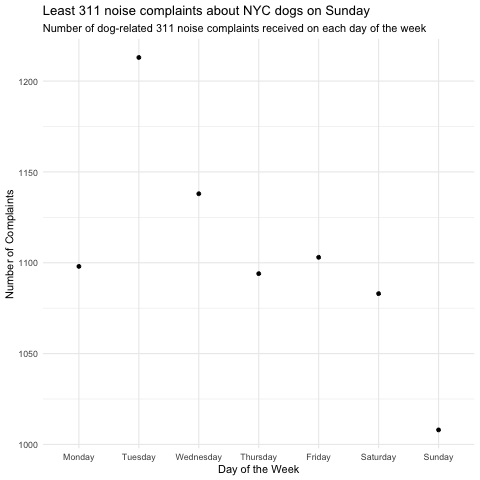

In [14]:
%%R

# code for scatter plot 1
# be sure to include a meaningful title and subtitle

# Scatter plot of the number of complaints by the day of the week
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Convert 'Created Date' to DateTime and extract the day of the week
df$CreatedDate <- as.POSIXct(df$`Created Date`, format="%m/%d/%Y %I:%M:%S %p")
df$DayOfWeek <- weekdays(df$CreatedDate, abbreviate=FALSE)

# Ensure the order of the days starts with Monday and ends with Sunday
df$DayOfWeek <- factor(df$DayOfWeek, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

# Count the number of complaints for each day of the week
complaints_by_day <- df %>%
  group_by(DayOfWeek) %>%
  summarise(Count = n())

# Create a scatter plot
ggplot(complaints_by_day, aes(x = DayOfWeek, y = Count)) +
  geom_point() +
  theme_minimal() +
  labs(title = "Least 311 noise complaints about NYC dogs on Sunday",
         subtitle = "Number of dog-related 311 noise complaints received on each day of the week",
       x = "Day of the Week",
       y = "Number of Complaints")


In [ ]:
%%R

# code for scatter plot 2
# be sure to include a meaningful title and subtitle

In [ ]:
%%R

# code for scatter plot 3
# be sure to include a meaningful title and subtitle